In [83]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from data import DataFrame
from utils import open_csv_file
from mlxtend.plotting import plot_confusion_matrix

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [84]:
testing_data = open_csv_file('v2_testing_data.csv')

training_data = open_csv_file('v2_training_data.csv')
training_data_from_sampling = open_csv_file('v2_training_sampling_data.csv')
training_data_from_smote = open_csv_file('v2_training_smote_data.csv')

In [85]:
y_test =DataFrame(testing_data).get_df()[['DEATH_EVENT']]
X_test = DataFrame(testing_data).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

normal data

In [86]:
y_train =DataFrame(training_data).get_df()['DEATH_EVENT']
X_train = DataFrame(training_data).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]


In [87]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5, 1, 'auto'],
    "max_depth": [1,2,3, None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_s

{'max_depth': None,
 'max_features': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [88]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_features=0.5,
    max_depth=3,
    min_samples_split=2,
    random_state=0
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [89]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))

Accuracy Score: 0.8667
Random Forest Classifier f1-score      : 0.8000
Random Forest Classifier precision     : 0.9412
Random Forest Classifier recall        : 0.6957
Random Forest Classifier roc auc score : 0.8343


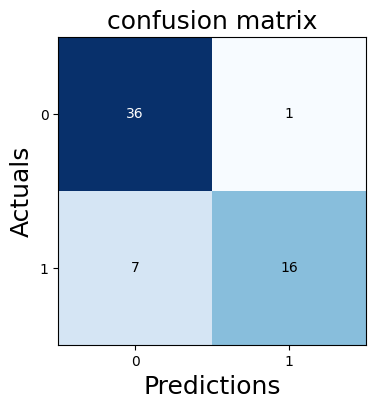

In [90]:
cm = confusion_matrix(y_test, y_pred)

## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

resampling

In [91]:
y_train_resampling =DataFrame(training_data_from_sampling).get_df()['DEATH_EVENT']
X_train_resampling = DataFrame(training_data_from_sampling).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

In [92]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5, 1, 'auto'],
    "max_depth": [1,2,3, None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train_resampling, y_train_resampling)
grid.best_params_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_s

{'max_depth': 2,
 'max_features': 0.5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [93]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_features=1,
    max_depth=3,
    min_samples_split=8,
    random_state=0
)

clf.fit(X_train_resampling, y_train_resampling)
y_pred_resampling = clf.predict(X_test)

In [94]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred_resampling)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred_resampling)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred_resampling)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred_resampling)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred_resampling)))

Accuracy Score: 0.9000
Random Forest Classifier f1-score      : 0.8846
Random Forest Classifier precision     : 0.7931
Random Forest Classifier recall        : 1.0000
Random Forest Classifier roc auc score : 0.9189


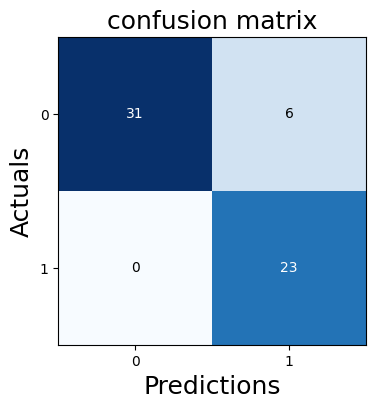

In [95]:
cm = confusion_matrix(y_test, y_pred_resampling)

## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

SMOTE

In [96]:
y_train_smote =DataFrame(training_data_from_smote).get_df()['DEATH_EVENT']
X_train_smote = DataFrame(training_data_from_smote).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

In [97]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5, 1, 'auto'],
    "max_depth": [1,2,3, None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train_smote, y_train_smote)
grid.best_params_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=0.5, min_samples_s

{'max_depth': 2,
 'max_features': 0.5,
 'min_samples_split': 8,
 'n_estimators': 500}

In [98]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_features=1,
    max_depth=3,
    min_samples_split=8,
    random_state=0
)

clf.fit(X_train_smote, y_train_smote)
y_pred_resampling = clf.predict(X_test)

In [99]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred_resampling)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred_resampling)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred_resampling)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred_resampling)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred_resampling)))

Accuracy Score: 0.9500
Random Forest Classifier f1-score      : 0.9333
Random Forest Classifier precision     : 0.9545
Random Forest Classifier recall        : 0.9130
Random Forest Classifier roc auc score : 0.9430


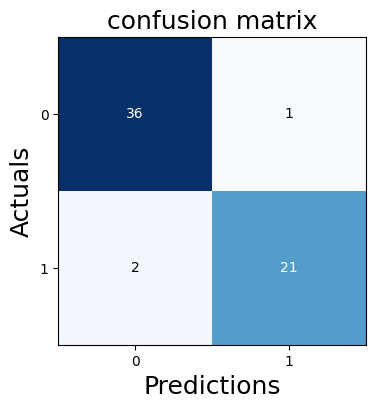

In [100]:
cm = confusion_matrix(y_test, y_pred_resampling)

## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()